In [2]:
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plot
import SimpleITK as sitk
from utils.dataset_util import batch_means_stdevs, data_to_normalize

In [51]:
image_path = "/Users/WangHao/工作/实习相关/微创卜算子医疗科技有限公司/陈嘉懿组/数据/佳文数据_0714/dataset_0706/52_4/image.png"
image = cv2.imread(image_path)
image_p = image
image_n = image

In [52]:
dataset_path = "/Users/WangHao/工作/实习相关/微创卜算子医疗科技有限公司/陈嘉懿组/数据/嘉懿数据_0706/dataset_0706_nb"
img_size = (384, 320)
means, stds = batch_means_stdevs(path=f"{dataset_path}/*/image*", image_size=img_size)
image_p = cv2.resize(image_p, img_size, interpolation=cv2.INTER_CUBIC)
image_p = np.transpose(image_p, (2, 0, 1))
trans_image_p = data_to_normalize(image_p, means, stds)
trans_image_p = np.expand_dims(trans_image_p, axis=0)
trans_image_p = torch.tensor(trans_image_p, dtype=torch.float32)

In [53]:
trained_model = "/Users/WangHao/工作/实习相关/微创卜算子医疗科技有限公司/陈嘉懿组/代码/横切/results/trained_model/cs_roi_timm-efficientnet-b0_0.119961_13_0.001_20220721173040_171p.pth"
model_p = torch.load(trained_model)

In [54]:
pred_img_p = model_p(trans_image_p)

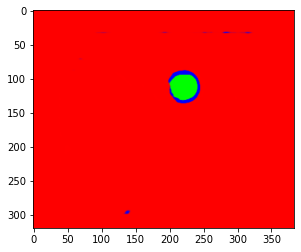

In [55]:
plot.figure(0)
plot.imshow(pred_img_p.detach().numpy()[0].transpose((1, 2, 0)))
plot.show()

In [56]:
dataset_path = "/Users/WangHao/工作/实习相关/微创卜算子医疗科技有限公司/陈嘉懿组/数据/佳文数据_0714/dataset_0706"
img_size = (384, 320)
means, stds = batch_means_stdevs(path=f"{dataset_path}/*/image*", image_size=img_size)
image_n = cv2.resize(image_n, img_size, interpolation=cv2.INTER_CUBIC)
image_n = np.transpose(image_n, (2, 0, 1))
trans_image_n = data_to_normalize(image_n, means, stds)
trans_image_n = np.expand_dims(trans_image_n, axis=0)
trans_image_n = torch.tensor(trans_image_n, dtype=torch.float32)

In [57]:
trained_model = "/Users/WangHao/工作/实习相关/微创卜算子医疗科技有限公司/陈嘉懿组/代码/横切/results/trained_model/cs_roi_timm-efficientnet-b0_0.149035_31_0.001_20220721232519_590n.pth"
model_n = torch.load(trained_model)

In [58]:
pred_img_n = model_n(trans_image_n)

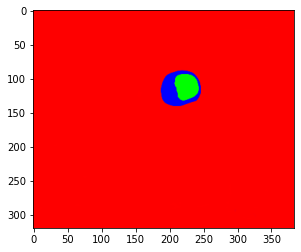

In [59]:
plot.figure(0)
plot.imshow(pred_img_n.detach().numpy()[0].transpose((1, 2, 0)))
plot.show()

In [72]:
cv_pred_n = np.zeros_like(pred_img_n.detach().numpy(), dtype=np.uint8)
cv_pred_n[pred_img_n.detach().numpy() >= 0.5] = 255
cv_pred_n = cv_pred_n[0].transpose((1, 2, 0))
cv_pred_n = cv2.cvtColor(cv_pred_n, cv2.COLOR_BGR2RGB)

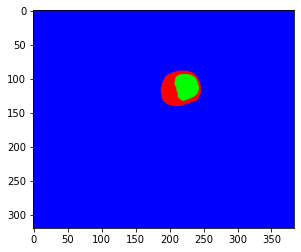

In [73]:
plot.figure(0)
plot.imshow(cv_pred_n)
plot.show()

In [74]:
cv_pred_p = np.zeros_like(pred_img_p.detach().numpy(), dtype=np.uint8)
cv_pred_p[pred_img_p.detach().numpy() >= 0.5] = 255
cv_pred_p = cv_pred_p[0].transpose((1, 2, 0))

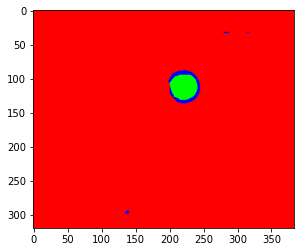

In [75]:
plot.figure(0)
plot.imshow(cv_pred_p)
plot.show()

In [80]:
image_resize = cv2.resize(image, img_size, interpolation=cv2.INTER_CUBIC)
image_pred_p = cv2.addWeighted(image_resize, 0.7, cv_pred_p, 0.3, 0)
image_pred_n = cv2.addWeighted(image_resize, 0.7, cv_pred_n, 0.3, 0)
image_pred = cv2.addWeighted(image_pred_p, 0.5, image_pred_n, 0.5, 0)

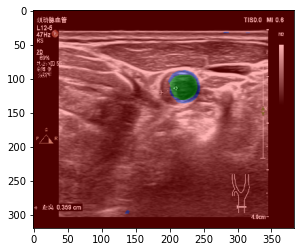

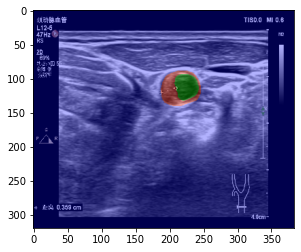

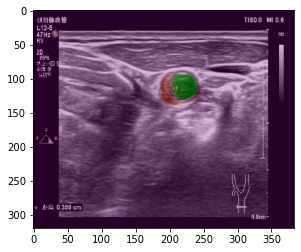

In [81]:
plot.figure(0)
plot.imshow(image_pred_p)
plot.figure(1)
plot.imshow(image_pred_n)
plot.figure(2)
plot.imshow(image_pred)
plot.show()

In [10]:
image = sitk.GetArrayFromImage(sitk.ReadImage('/Users/WangHao/工作/实习相关/微创卜算子医疗科技有限公司/陈嘉懿组/数据/佳文数据_0722/短轴视频_0722/label_crop/202203241105420022VAS.nii.gz'))

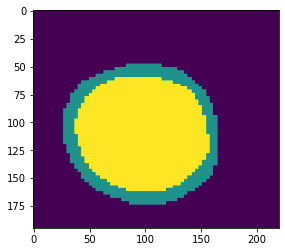

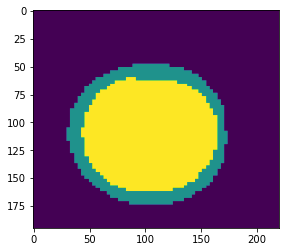

In [9]:
plot.figure(0)
plot.imshow(image[..., 0])
plot.figure(1)
plot.imshow(image[..., 1])

In [6]:
b = np.expand_dims(image, -1).repeat(3, -1)